In [28]:
import pandas as pd
from pathlib import Path
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm, ensemble, neighbors
from xgboost import XGBRegressor



In [2]:
parent_folder = Path('C:/Users/s.coll/Documents/Udacity Data Science Course/01-Project Airlines')
dataset_folder = Path('C:/Users/s.coll/Documents/Udacity Data Science Course/01-Project Airlines/data')
dataset_path = dataset_folder/'Clean_Dataset.csv'

### Load Data

In [3]:
df_all = pd.read_csv(dataset_path, index_col=0)
indep_cols = [col for col in df_all.columns if col != 'price']

### Process Data

In [4]:
#convert indian rupee to euro (1 Indian Rupee = 0.012 Euro)
df = df_all.copy()
df['price'] = df['price'] * 0.012
#define categorical variables
# df['stops'] = df['stops'].astype('category')
# df['departure_time'] = df['departure_time'].astype('category')
# df['arrival_time'] = df['arrival_time'].astype('category')
# #order categories
# df['stops'] = df['stops'].cat.set_categories(['zero', 'one', 'two_or_more'],ordered=True)
# df['departure_time'] = df['departure_time'].cat.set_categories(['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'],ordered=True)
# df['arrival_time'] = df['arrival_time'].cat.set_categories(['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'],ordered=True)
# #bin data
# bins_hours = np.arange(start = 0, stop = 50, step = 1)
# df['duration_h'] = pd.cut(df['duration'],bins_hours, labels=bins_hours[1:])
# df['duration_h'] = df['duration_h'].astype(float)


### Encoding Categorical Data

In [5]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price               float64
dtype: object

#### Ordinal Encoding

In [6]:
encoder= ce.OrdinalEncoder(cols=['departure_time', 'arrival_time', 'stops'],return_df=True,
    mapping=[{'col':'departure_time',
     'mapping':{'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late_Night':5}},
    {'col':'arrival_time',
     'mapping':{'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late_Night':5}},
    {'col':'stops',
     'mapping':{'zero':0, 'one':1, 'two_or_more':2}}   
    ])
df_t = encoder.fit_transform(df)

#### One Hot Encoding

In [7]:
encoder=ce.OneHotEncoder(cols=['airline', 'class', 'destination_city', 'source_city'],
    handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_t = encoder.fit_transform(df_t)

C:\Users\s.coll\AppData\Roaming\Python\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\s.coll\AppData\Roaming\Python\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\s.coll\AppData\Roaming\Python\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\s.coll\AppData\Roaming\Python\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


#### Drop irrelevant columns

In [8]:
#drop flight number column, since it does not give relevant information
df_t = df_t.drop('flight', axis =1)


### Apply ML models

#### Split set into test and train

In [9]:
df_t.head()

,airline_SpiceJet,airline_AirAsia,airline_Vistara,airline_GO_FIRST,airline_Indigo,airline_Air_India,source_city_Delhi,source_city_Mumbai,source_city_Bangalore,source_city_Kolkata,...,destination_city_Bangalore,destination_city_Kolkata,destination_city_Hyderabad,destination_city_Chennai,destination_city_Delhi,class_Economy,class_Business,duration,days_left,price
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.17,1,71.436
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.33,1,71.436
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.17,1,71.472
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.25,1,71.460
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.33,1,71.460


In [10]:
X = df_t.drop('price', axis = 1)
y = df_t['price']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)

#### Scale data

In [11]:
min_max_scaler = MinMaxScaler()
X_train_minmax = pd.DataFrame(min_max_scaler.fit_transform(X_train),columns = X_train.columns)
X_test_minmax = pd.DataFrame(min_max_scaler.fit_transform(X_test),columns = X_test.columns)


In [12]:
standard_scaler = StandardScaler(with_mean=False)
rescale_cols = ['departure_time', 'stops', 'arrival_time', 'duration', 'days_left']
X_train_stand_cols = pd.DataFrame(standard_scaler.fit_transform(X_train[rescale_cols]),columns = rescale_cols, index = X_train.index)
X_test_stand_cols = pd.DataFrame(standard_scaler.fit_transform(X_test[rescale_cols]),columns = rescale_cols, index = X_test.index)
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
X_train_stand[rescale_cols] = X_train_stand_cols
X_test_stand[rescale_cols] = X_test_stand_cols
X_test_stand.head()

,airline_SpiceJet,airline_AirAsia,airline_Vistara,airline_GO_FIRST,airline_Indigo,airline_Air_India,source_city_Delhi,source_city_Mumbai,source_city_Bangalore,source_city_Kolkata,...,destination_city_Mumbai,destination_city_Bangalore,destination_city_Kolkata,destination_city_Hyderabad,destination_city_Chennai,destination_city_Delhi,class_Economy,class_Business,duration,days_left
27131,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.742916,2.953359
266857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.365208,3.101027
141228,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.458259,3.027193
288329,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.013786,1.033676
97334,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.145775,1.476680


In [13]:
lm_model = LinearRegression()
lm_model.fit(X_train_minmax, y_train)

y_test_pred = lm_model.predict(X_test_minmax)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2, mse

(0.909747965030965, 6688.756672016184)

In [29]:
lasso_model = Lasso()
lasso_model.fit(X_train_minmax, y_train)

y_test_pred = lasso_model.predict(X_test_minmax)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2, mse

(0.9075505876270412, 6851.608653985069)

In [30]:
ridge_model = Ridge()
ridge_model.fit(X_train_minmax, y_train)

y_test_pred = ridge_model.predict(X_test_minmax)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2, mse

(0.9097486527927969, 6688.705700627626)

In [16]:
#### TAKES TOO LONG
# svr_model = svm.SVR(kernel = 'rbf', epsilon = 200, C=10)
# svr_model.fit(X_train_stand, y_train)

# y_test_pred = svr_model.predict(X_test_stand)

# r2 = r2_score(y_test, y_test_pred)
# mse = mean_squared_error(y_test, y_test_pred)
# r2, mse

In [17]:
rdforest_model = ensemble.RandomForestRegressor()
rdforest_model.fit(X_train_stand, y_train)

y_test_pred = rdforest_model.predict(X_test_stand)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2, mse 

(0.9846389201240192, 1138.4399869220913)

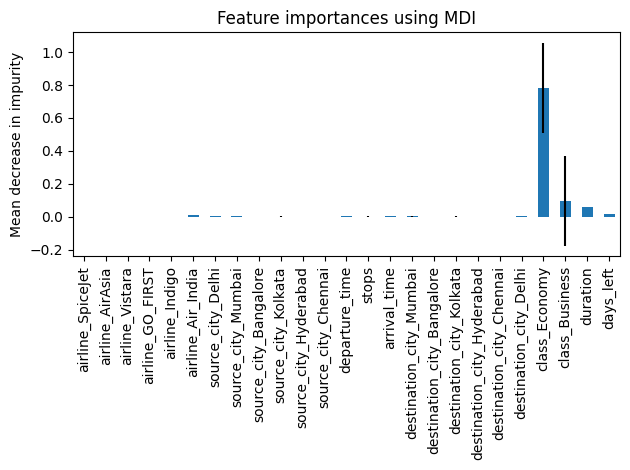

In [26]:
importances = rdforest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rdforest_model.estimators_], axis=0)
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [20]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_stand, y_train)

y_test_pred = xgb_model.predict(X_test_stand)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2, mse 

(0.9764232063021446, 1747.3227745544448)

In [25]:

knn_model = neighbors.KNeighborsRegressor()
knn_model.fit(X_train_stand, y_train)

y_test_pred = knn_model.predict(X_test_stand)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2, mse 

KeyboardInterrupt: 

In [31]:
lm_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
rdforest_model = ensemble.RandomForestRegressor()
xgb_model = XGBRegressor()
models = {'linear_regression': lm_model, 'lasso':lasso_model, 'ridge': ridge_model,
    'random_forest': rdforest_model, 'xtremeGradientBooster':xgb_model}

In [34]:
df_evaluation = pd.DataFrame(columns = ['r2', 'mean_squared_error'], index = models.keys())
for model_name, model in models.items():
    model.fit(X_train_stand, y_train)

    y_test_pred = model.predict(X_test_stand)

    r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    df_evaluation.loc[model_name,'r2'] = r2
    df_evaluation.loc[model_name,'mean_squared_error'] = mse
df_evaluation

,r2,mean_squared_error
linear_regression,0.909764,6687.597465
lasso,0.908561,6776.694405
ridge,0.909764,6687.535634
random_forest,0.984657,1137.069827
xtremeGradientBooster,0.976423,1747.322775


In [54]:
df_evaluation = df_evaluation.sort_values(by=['r2'],ascending=False)
df_evaluation['base'] = 0.8

In [55]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter( x = df_evaluation.index, y =df_evaluation['mean_squared_error'], name = 'mean squared error'))
fig.add_trace(go.Scatter( x = df_evaluation.index, y =df_evaluation['r2'], name = 'r2'), secondary_y = True)